### 載入套件

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.python.keras.utils import np_utils
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models,optimizers
import matplotlib.pyplot as plt
import cv2

### 載入資料

(50000, 32, 32, 3)
(50000, 1)
(50000, 10) (10000, 10)


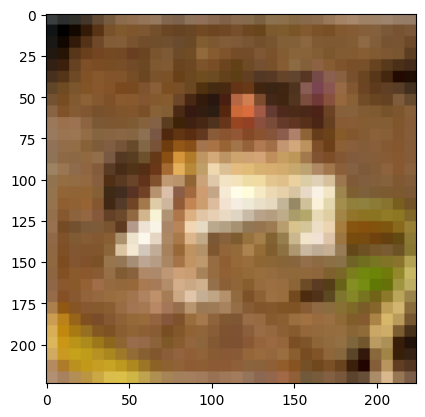

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

#x_train=x_train.astype('float32')/255
#x_test=x_test.astype('float32')/255

print(y_train.shape,y_test.shape)

x_train_mean=np.mean(x_train)
x_test_mean=np.mean(x_test)

#x_train-=x_train_mean
#x_test-=x_test_mean

plt.imshow(x_train[0])
tt=np.zeros((224,224,3))
tt=cv2.resize(x_train[0],(224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(tt)

### 定義模型

In [3]:
def Alexnet():
    inp=layers.Input(shape=(224,224,3))
    
    L1=layers.ZeroPadding2D((2,2))(inp)
    L1=layers.Conv2D(96,(11,11),strides=(4,4),padding='valid',activation='relu')(L1)#55
    L1=layers.MaxPooling2D((3,3),strides=(2,2))(L1)#27
    
    L2=layers.Conv2D(256,(5,5),activation='relu',padding='same')(L1)#27
    L2=layers.MaxPooling2D((3,3),strides=(2,2))(L2)#13
    
    L3=layers.Conv2D(384,(3,3),activation='relu',padding='same')(L2)#13
    
    L4=layers.Conv2D(384,(3,3),activation='relu',padding='same')(L3)#13
    
    L5=layers.Conv2D(256,(3,3),activation='relu',padding='same')(L4)#13
    L5=layers.MaxPooling2D((3,3),strides=(2,2))(L5)
    
    fc=layers.Flatten()(L5)
    
    fc1=layers.Dense(4096)(fc)
    fc1=layers.BatchNormalization()(fc1)
    fc1=layers.Activation('relu')(fc1)
    fc1=layers.Dropout(0.5)(fc1)
    
    fc2=layers.Dense(4096)(fc1)
    fc2=layers.BatchNormalization()(fc2)
    fc2=layers.Activation('relu')(fc2)
    fc2=layers.Dropout(0.5)(fc2)
    
    pred=layers.Dense(10)(fc2)
    pred=layers.BatchNormalization()(pred)
    pred=layers.Activation('softmax')(pred)
    
    model=models.Model(inp,pred)
    omz=optimizers.Adam(lr=0.01)
    model.compile(optimizer=omz,loss='categorical_crossentropy',metrics=['acc'])
    model.summary()
    return model

### 將圖型改變大小

In [4]:
from tensorflow.keras.preprocessing import image
import cv2

X_TRAIN=np.zeros((x_train.shape[0],224,224,x_train.shape[3]))
X_TEST=np.zeros((x_test.shape[0],224,224,x_test.shape[3]))
print(X_TRAIN.shape,X_TEST.shape)
for i in range(x_train.shape[0]):
    X_TRAIN[i]=cv2.resize(x_train[i],(224,224),interpolation=cv2.INTER_NEAREST)
    
for i in range(x_test.shape[0]):
    X_TEST[i]=cv2.resize(x_test[i],(224,224),interpolation=cv2.INTER_NEAREST)

(50000, 224, 224, 3) (10000, 224, 224, 3)


### 生成資料流

In [5]:
train_data_gen=image.ImageDataGenerator()
train_gen=train_data_gen.flow(X_TRAIN,y_train,batch_size=32)

test_data_gen=image.ImageDataGenerator()
test_gen=test_data_gen.flow(X_TEST,y_test,batch_size=32)

### 開始訓練

In [6]:
model=Alexnet()
model.fit_generator(train_gen,steps_per_epoch=50000/32,epochs=10)

c:\Users\joshhu\anaconda3\envs\tf2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 228, 228, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0     

C:\Users\joshhu\AppData\Local\Temp\ipykernel_3520\4093157502.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen,steps_per_epoch=50000/32,epochs=10)


1562/1562 [==============================] - 81s 48ms/step - loss: 1.5945 - acc: 0.4200
Epoch 2/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.2200 - acc: 0.5623
Epoch 3/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.0453 - acc: 0.6331
Epoch 4/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.9131 - acc: 0.6797
Epoch 5/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.8155 - acc: 0.7148
Epoch 6/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.7225 - acc: 0.7489
Epoch 7/10
1562/1562 [==============================] - 26s 16ms/step - loss: 0.6377 - acc: 0.7779
Epoch 8/10
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5616 - acc: 0.8041
Epoch 9/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.4950 - acc: 0.8264
Epoch 10/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.4364 - acc: 0.8490


### 測試準確度

In [7]:
model.evaluate_generator(test_gen)

C:\Users\joshhu\AppData\Local\Temp\ipykernel_3520\7556299.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_gen)


[0.7455065250396729, 0.7621999979019165]